In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls

EDA_and_xgboost.ipynb  README.md  tmva-tutorial  train1000.npy


In [3]:
train_file_name = 'train1000.npy'

In [4]:
train_array = np.load(train_file_name, encoding='bytes')

In [5]:
train_rec_array = train_array.view(np.recarray)

In [6]:
train_df = pd.DataFrame.from_records(train_rec_array)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
genjet_sd_m            9999 non-null float32
recojet_pt             9999 non-null float32
recojet_eta            9999 non-null float32
recojet_phi            9999 non-null float32
recojet_m              9999 non-null float32
recojet_sd_pt          9999 non-null float32
recojet_sd_eta         9999 non-null float32
recojet_sd_phi         9999 non-null float32
recojet_sd_m           9999 non-null float32
n_constituents         9999 non-null int32
constituents_pt        9999 non-null object
constituents_eta       9999 non-null object
constituents_phi       9999 non-null object
constituents_charge    9999 non-null object
constituents_dxy       9999 non-null object
constituents_dz        9999 non-null object
constituents_Eem       9999 non-null object
constituents_Ehad      9999 non-null object
dtypes: float32(9), int32(1), object(8)
memory usage: 1015.6+ KB


In [8]:
train_df.describe()

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,188.271545,5598.546387,0.005100,0.015231,340.655426,5352.076172,0.005039,0.015267,244.725266,57.646365
std,269.372711,1341.564209,0.964234,1.812726,230.185379,1335.238159,0.964095,1.812713,246.470001,30.057845
min,-0.000086,695.083618,-3.038265,-3.141127,10.746867,580.218262,-3.038052,-3.140986,-0.000211,2.000000
25%,8.103290,4890.456055,-0.711367,-1.537065,183.044296,4611.112793,-0.711603,-1.535218,87.729088,34.000000
50%,57.497952,5414.160156,0.012420,0.016002,271.195160,5198.435059,0.013104,0.016794,155.290298,52.000000
75%,272.853622,6152.576660,0.723749,1.598497,429.211487,5928.617920,0.723199,1.597326,303.100845,75.000000
max,2683.092041,16608.357422,2.567626,3.141252,2912.589111,16572.093750,2.572079,3.140942,2912.589111,227.000000


In [9]:
train_df.head()

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents,constituents_pt,constituents_eta,constituents_phi,constituents_charge,constituents_dxy,constituents_dz,constituents_Eem,constituents_Ehad
0,6.285021,5093.908691,-0.492611,1.106933,166.851654,4907.403320,-0.491663,1.105769,120.999168,50,"[1.13794, 1.71443, 0.399515, 1.43171, 8.14088,...","[-0.781574, -0.45416, -0.217684, -0.696161, -0...","[0.922307, 1.41593, 1.199, 1.11402, 1.04489, 1...","[1.0, 1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0....","[0.0180221, 0.0050095, -0.0121964, 0.0101132, ...","[-0.0339262, -0.0477318, -0.000906341, 0.00129...","[0.0, 0.0, 0.0, 0.0, 0.0, 7.50819, 0.0, 13.77,...","[1.50356, 1.8943, 0.409019, 1.79288, 8.58119, ..."
1,564.034302,2995.798096,-0.382037,1.958864,542.748535,2991.528809,-0.381463,1.959137,540.299133,42,"[5.29648, 3.24685, 9.5276, 4.93201, 25.2944, 1...","[-0.586508, -0.639587, -0.373297, -0.386013, -...","[2.24915, 2.17218, 2.3041, 2.30512, 2.21263, 2...","[0.0, 1.0, 0.0, -1.0, -1.0, 1.0, 0.0, 0.0, 0.0...","[-999.0, -0.00983114, -999.0, -0.00909303, -0....","[-999.0, -0.0322307, -999.0, -0.0223435, -0.03...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.09843, 40.515...","[6.23387, 3.93389, 10.1992, 5.30404, 27.0993, ..."
2,615.282471,7282.272949,0.724502,2.508060,604.372070,7274.226074,0.724465,2.508207,599.379395,78,"[1.07209, 0.435585, 0.472205, 3.90163, 0.98657...","[0.700602, 1.07253, 0.403602, 0.830048, 0.9364...","[2.89062, 2.35749, 2.35569, 2.22027, 2.70917, ...","[-1.0, -1.0, -1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1....","[-0.01305, -0.00197237, -0.000907461, -0.01513...","[-0.053074, -0.0424289, -0.255195, -0.00926004...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.34615, 0.71107, 0.51119, 5.32466, 1.45167, ..."
3,233.040070,4860.147949,1.160326,-0.578850,428.898621,4553.962891,1.142592,-0.581841,268.025879,86,"[2.98332, 1.577, 8.34611, 16.0977, 5.79769, 3....","[1.5143, 1.53888, 1.49021, 1.49341, 1.46401, 1...","[-0.414211, -0.628054, -0.465748, -0.481728, -...","[-1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0...","[-0.00684255, -0.0108126, -999.0, -999.0, -999...","[0.00274116, 0.0257202, -999.0, -999.0, -999.0...","[0.0, 0.0, 19.2044, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.10953, 3.84315, 0.0, 37.6608, 13.2048, 7.94..."
4,58.625267,5521.968750,0.546126,-0.397793,149.988968,5485.352539,0.546083,-0.397065,125.393852,32,"[1.73896, 2.30415, 3.46168, 0.997282, 2.49383,...","[0.182785, 0.880044, 0.492467, 0.456339, 0.489...","[-0.512721, -0.374791, -0.700661, -0.570214, -...","[-1.0, 1.0, -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 1....","[-0.00840534, 0.00114274, -0.00238161, -0.0142...","[0.135301, 0.143852, 0.161377, 0.107708, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.57892, 0.0, 0.0, 0...","[1.76809, 3.2555, 3.89, 1.10294, 2.7989, 0.0, ..."


In [10]:
train_df.corr()

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents
genjet_sd_m,1.000000,0.112968,0.008699,0.004183,0.857758,0.179860,0.008773,0.004405,0.931678,0.613235
recojet_pt,0.112968,1.000000,0.000650,0.007985,0.291957,0.976393,0.000565,0.007775,0.217494,0.041824
recojet_eta,0.008699,0.000650,1.000000,-0.004682,0.004576,0.003542,0.999984,-0.004947,0.007495,0.002370
recojet_phi,0.004183,0.007985,-0.004682,1.000000,-0.002838,0.007897,-0.004672,0.997596,0.000010,-0.001499
recojet_m,0.857758,0.291957,0.004576,-0.002838,1.000000,0.308977,0.004469,-0.003066,0.904172,0.680073
recojet_sd_pt,0.179860,0.976393,0.003542,0.007897,0.308977,1.000000,0.003493,0.007863,0.304121,0.021302
recojet_sd_eta,0.008773,0.000565,0.999984,-0.004672,0.004469,0.003493,1.000000,-0.004939,0.007514,0.002353
recojet_sd_phi,0.004405,0.007775,-0.004947,0.997596,-0.003066,0.007863,-0.004939,1.000000,0.000032,-0.001678
recojet_sd_m,0.931678,0.217494,0.007495,0.000010,0.904172,0.304121,0.007514,0.000032,1.000000,0.573451
n_constituents,0.613235,0.041824,0.002370,-0.001499,0.680073,0.021302,0.002353,-0.001678,0.573451,1.000000


## EDA

recojet_pt
recojet_eta
recojet_phi
recojet_m
recojet_sd_pt
recojet_sd_eta
recojet_sd_phi
recojet_sd_m
n_constituents


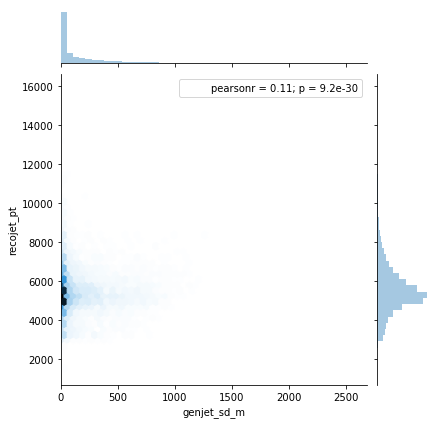

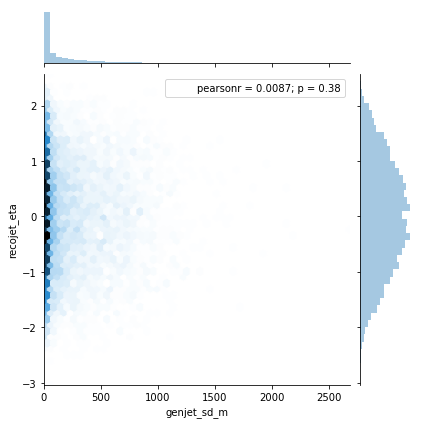

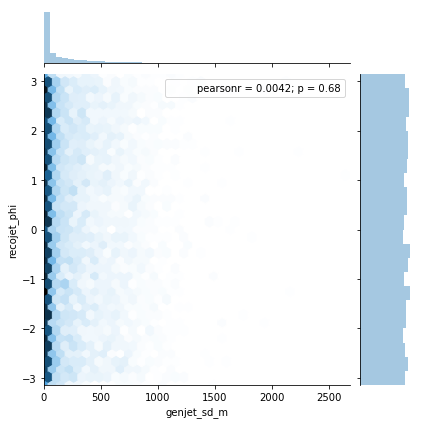

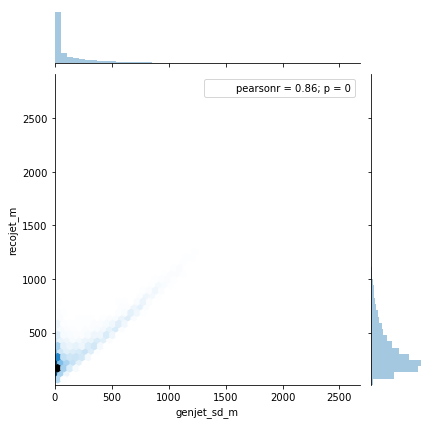

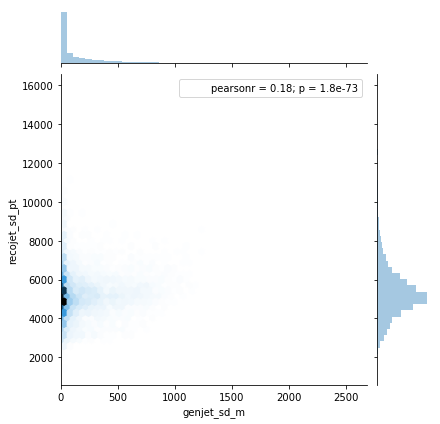

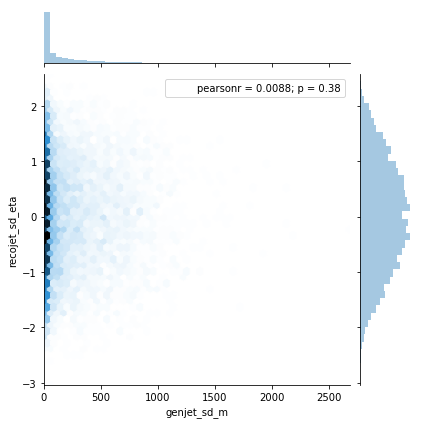

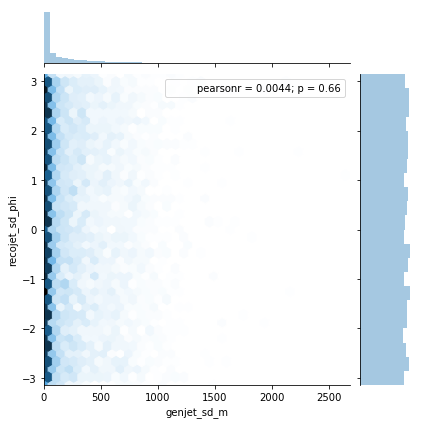

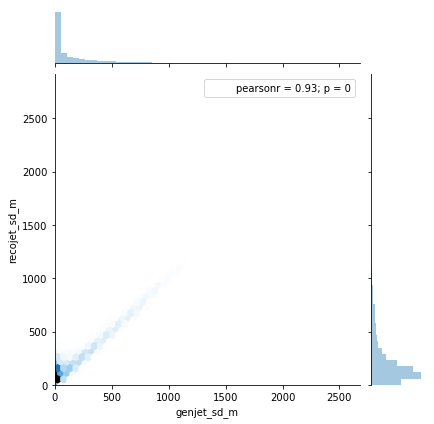

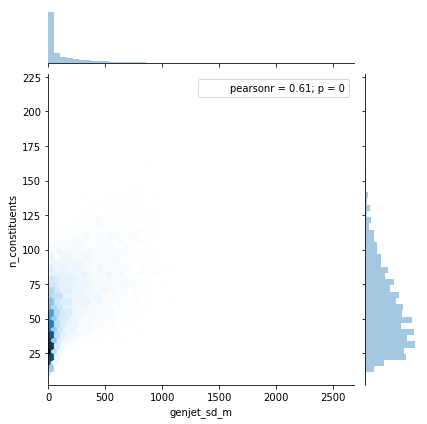

In [11]:
for var in ['recojet_pt', 'recojet_eta', 'recojet_phi', 'recojet_m',
       'recojet_sd_pt', 'recojet_sd_eta', 'recojet_sd_phi', 'recojet_sd_m',
       'n_constituents']:
    print(var)
    sns.jointplot(x='genjet_sd_m', y=var, data=train_df, kind='hex')

### Feature engineering and drop some columns

In [12]:
train_df.columns

Index(['genjet_sd_m', 'recojet_pt', 'recojet_eta', 'recojet_phi', 'recojet_m',
       'recojet_sd_pt', 'recojet_sd_eta', 'recojet_sd_phi', 'recojet_sd_m',
       'n_constituents', 'constituents_pt', 'constituents_eta',
       'constituents_phi', 'constituents_charge', 'constituents_dxy',
       'constituents_dz', 'constituents_Eem', 'constituents_Ehad'],
      dtype='object')

In [13]:
columns_to_drop = []
columns_arrays = ['constituents_pt', 'constituents_eta',
       'constituents_phi', 'constituents_charge', 'constituents_dxy',
       'constituents_dz', 'constituents_Eem', 'constituents_Ehad']
columns_insignificant = ['recojet_eta', 'recojet_phi', 
       'recojet_sd_eta', 'recojet_sd_phi']

In [14]:
columns_to_drop.extend(columns_arrays)
#columns_to_drop.extend(columns_insignificant)

In [15]:
train_df.drop(columns_to_drop, axis=1, inplace=True)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
genjet_sd_m       9999 non-null float32
recojet_pt        9999 non-null float32
recojet_eta       9999 non-null float32
recojet_phi       9999 non-null float32
recojet_m         9999 non-null float32
recojet_sd_pt     9999 non-null float32
recojet_sd_eta    9999 non-null float32
recojet_sd_phi    9999 non-null float32
recojet_sd_m      9999 non-null float32
n_constituents    9999 non-null int32
dtypes: float32(9), int32(1)
memory usage: 390.7 KB


### Split and normalise

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('genjet_sd_m', axis=1), train_df['genjet_sd_m'] , test_size=0.30, random_state=314)

# XGBoost regressor

### Convert to xgboost input structure

In [19]:
import xgboost as xgb

In [20]:
# construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
xgbmat_train = xgb.DMatrix( data=X_train, label=y_train, missing = -999.0 )

In [21]:
isinstance(xgbmat_train , xgb.DMatrix)

True

## Build the XGBoost model

In [84]:
def evaluate_loss(predictions, truth):  
    #truth is xgb.DMatrix in fact, thust .get_label to get the y column
    if isinstance(truth , xgb.DMatrix):
        t = truth.get_label()
    else:
        t = truth
    ratio = predictions / t
    a = np.nanpercentile(ratio, 84, interpolation='nearest')  
    b = np.nanpercentile(ratio, 16, interpolation='nearest')  
    c = np.nanpercentile(ratio, 50, interpolation='nearest')  
    loss = (a-b)/(2.*c)  
    return loss

In [85]:
def evaluate_loss_xgb(predictions, truth):  
    loss = evaluate_loss(predictions, truth)
    return ('xxx', loss)  

In [76]:
#preliminary parameters. will be fine-tuned in the GridSearch
xgb_params = {'max_depth': 5, 'learning_rate':0.1, 'n_estimators':500,
              'silent':1, 'random_state': 314, 'seed': 314}

In [77]:
clf = xgb.XGBRegressor(**xgb_params)

## Do a comparison of feature importance and extract the optimal number of trees

In [92]:
#an adjusted function from this post: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        print("Decided on {} trees".format(cvresult.shape[0]))

    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric=evaluate_loss_xgb)
        
    #Predict training set:
    pred = alg.predict(X_train)
        
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % sqrt(mean_squared_error(y_train, pred)))
    print("Custom loss : %.4g" % evaluate_loss(y_train, pred))
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

Decided on 48 trees

Model Report
RMSE : 65.39
Custom loss : 0.6546


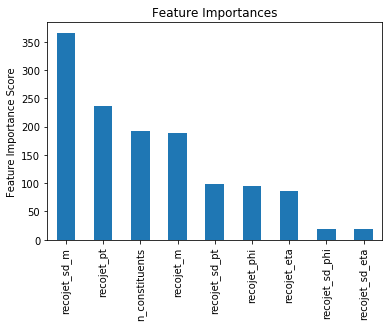

In [93]:
modelfit(clf, X_train, y_train)

## GridSearch to determine the optimal parameters

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
from sklearn.metrics import make_scorer

In [ ]:
The next cell is CPU intense! do not try it on the full dataset!!!!!

In [ ]:
param_test1 = {'max_depth': [3,5,7],
               'min_child_weight': [1,3],
               'gamma': [0,1e-3,1e-1],
               'subsample': [0.6,0.8,1],
               'colsample_bytree':[0.6,0.8,1],
               'reg_alpha':[0, 1e-3, 1e-1],
               'reg_lambda':[1, 1e-1, 1e-3]}
gs1 = GridSearchCV(estimator=clf, param_grid=param_test1, 
                   scoring=make_scorer(evaluate_loss, greater_is_better=False),
                   n_jobs=4, cv=5)
gs1.fit(X_train, y_train)
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.grid_scores_)

## Temporary stuff. To be decided how to treat it....

In [43]:
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=evaluate_loss_xgb,
        verbose=False)

/home/mlisovyi/anaconda2/envs/coursera_aml_yandex/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=314,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=314, silent=1,
       subsample=1)

In [ ]:
evals_result = clf.evals_result()
print(evals_result)